<a href="https://colab.research.google.com/github/BrunoMinetti/Colab/blob/main/TSE_Ocean_CienciaDados_24_02_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
sigla_uf = 'SP'

url = f'https://raw.githubusercontent.com/paulosalvatore/Ocean_CienciaDados_24_02_2021/main/receitas_candidatos/receitas_candidatos_2018_{sigla_uf}.csv'

df = pd.read_csv(url, sep=';', decimal=',', thousands='.', encoding='latin1')

In [2]:
df

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,CD_ELEICAO,DS_ELEICAO,DT_ELEICAO,ST_TURNO,TP_PRESTACAO_CONTAS,DT_PRESTACAO_CONTAS,SQ_PRESTADOR_CONTAS,SG_UF,SG_UE,NM_UE,NR_CNPJ_PRESTADOR_CONTA,CD_CARGO,DS_CARGO,SQ_CANDIDATO,NR_CANDIDATO,NM_CANDIDATO,NR_CPF_CANDIDATO,NR_CPF_VICE_CANDIDATO,NR_PARTIDO,SG_PARTIDO,NM_PARTIDO,CD_FONTE_RECEITA,DS_FONTE_RECEITA,CD_ORIGEM_RECEITA,DS_ORIGEM_RECEITA,CD_NATUREZA_RECEITA,DS_NATUREZA_RECEITA,CD_ESPECIE_RECEITA,DS_ESPECIE_RECEITA,CD_CNAE_DOADOR,DS_CNAE_DOADOR,NR_CPF_CNPJ_DOADOR,NM_DOADOR,NM_DOADOR_RFB,CD_ESFERA_PARTIDARIA_DOADOR,DS_ESFERA_PARTIDARIA_DOADOR,SG_UF_DOADOR,CD_MUNICIPIO_DOADOR,NM_MUNICIPIO_DOADOR,SQ_CANDIDATO_DOADOR,NR_CANDIDATO_DOADOR,CD_CARGO_CANDIDATO_DOADOR,DS_CARGO_CANDIDATO_DOADOR,NR_PARTIDO_DOADOR,SG_PARTIDO_DOADOR,NM_PARTIDO_DOADOR,NR_RECIBO_DOACAO,NR_DOCUMENTO_DOACAO,SQ_RECEITA,DT_RECEITA,DS_RECEITA,VR_RECEITA
0,11/03/2020,01:27:32,2018,2,Ordinária,297,Eleição Geral Federal 2018,07/10/2018,1,Final,28/10/2019,416868398,SP,SP,SÃO PAULO,31143594000113,6,Deputado Federal,250000601962,3003,AGLIBERTO DO SOCORRO CHAGAS,6249715894,-1,30,NOVO,Partido Novo,1,Outros Recursos,10010100,Recursos próprios,1,Financeiro,1,Transferência eletrônica,-1,#NULO#,6249715894,AGLIBERTO DO SOCORRO CHAGAS,AGLIBERTO DO SOCORRO CHAGAS,#NULO#,#NULO#,SP,-1,#NULO#,250000601962,3003,6,Deputado Federal,30,NOVO,Partido Novo,030030600000SP000004E,6249715894,12520121,31/08/2018,#NULO#,7800.0
1,11/03/2020,01:27:32,2018,2,Ordinária,297,Eleição Geral Federal 2018,07/10/2018,1,Final,28/10/2019,416868398,SP,SP,SÃO PAULO,31143594000113,6,Deputado Federal,250000601962,3003,AGLIBERTO DO SOCORRO CHAGAS,6249715894,-1,30,NOVO,Partido Novo,1,Outros Recursos,10020500,Recursos de Financiamento Coletivo,1,Financeiro,1,Transferência eletrônica,74901,"Atividades profissionais, científicas e técnic...",22831673000126,Vakinha,VAKINHA.COM NEGOCIOS VIRTUAIS LTDA,#NULO#,#NULO#,#NULO#,-1,#NULO#,-1,-1,-1,#NULO#,-1,#NULO#,#NULO#,#NULO#,554,12520117,22/08/2018,#NULO#,500.0
2,11/03/2020,01:27:32,2018,2,Ordinária,297,Eleição Geral Federal 2018,07/10/2018,1,Final,28/10/2019,416868398,SP,SP,SÃO PAULO,31143594000113,6,Deputado Federal,250000601962,3003,AGLIBERTO DO SOCORRO CHAGAS,6249715894,-1,30,NOVO,Partido Novo,1,Outros Recursos,10020000,Recursos de partido político,1,Financeiro,1,Transferência eletrônica,94928,Atividades de organizações políticas,13405866000124,Direção Estadual/Distrital,PARTIDO NOVO,F,Federal (Estadual/Distrital),SP,-1,#NULO#,-1,-1,-1,#NULO#,30,NOVO,Partido Novo,030030600000SP000024E,551526000025460,12520148,18/09/2018,#NULO#,2500.0
3,11/03/2020,01:27:32,2018,2,Ordinária,297,Eleição Geral Federal 2018,07/10/2018,1,Final,28/10/2019,416868398,SP,SP,SÃO PAULO,31143594000113,6,Deputado Federal,250000601962,3003,AGLIBERTO DO SOCORRO CHAGAS,6249715894,-1,30,NOVO,Partido Novo,1,Outros Recursos,10010200,Recursos de pessoas físicas,1,Financeiro,1,Transferência eletrônica,-1,#NULO#,4954285828,URBANO CÍCERO DE FLEURY ARAÚJO,URBANO CICERO DE FLEURY ARAUJO,#NULO#,#NULO#,#NULO#,-1,#NULO#,-1,-1,-1,#NULO#,-1,#NULO#,#NULO#,030030600000SP000019E,5799719,12520142,02/10/2018,#NULO#,100.0
4,11/03/2020,01:27:32,2018,2,Ordinária,297,Eleição Geral Federal 2018,07/10/2018,1,Final,28/10/2019,416868398,SP,SP,SÃO PAULO,31143594000113,6,Deputado Federal,250000601962,3003,AGLIBERTO DO SOCORRO CHAGAS,6249715894,-1,30,NOVO,Partido Novo,1,Outros Recursos,10010200,Recursos de pessoas físicas,1,Financeiro,1,Transferência eletrônica,-1,#NULO#,10982734867,HENRIQUE GUARAGNA MARCONDES,HENRIQUE GUARAGNA MARCONDES,#NULO#,#NULO#,#NULO#,-1,#NULO#,-1,-1,-1,#NULO#,-1,#NULO#,#NULO#,030030600000SP000015E,60803,12520137,17/09/2018,#NULO#,1500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46833,11/03/2020,01:27:32,2018,2,Ordinária,297,Eleição Geral Federal 2018,0

In [3]:
df.VR_RECEITA

0         7800.0
1          500.0
2         2500.0
3          100.0
4         1500.0
          ...   
46833     1000.0
46834     1000.0
46835    13161.0
46836      250.0
46837     1050.0
Name: VR_RECEITA, Length: 46838, dtype: float64

In [4]:
df.describe()

,ANO_ELEICAO,CD_TIPO_ELEICAO,CD_ELEICAO,ST_TURNO,SQ_PRESTADOR_CONTAS,NR_CNPJ_PRESTADOR_CONTA,CD_CARGO,SQ_CANDIDATO,NR_CANDIDATO,NR_CPF_CANDIDATO,NR_CPF_VICE_CANDIDATO,NR_PARTIDO,CD_FONTE_RECEITA,CD_ORIGEM_RECEITA,CD_NATUREZA_RECEITA,CD_ESPECIE_RECEITA,CD_CNAE_DOADOR,NR_CPF_CNPJ_DOADOR,CD_MUNICIPIO_DOADOR,SQ_CANDIDATO_DOADOR,NR_CANDIDATO_DOADOR,CD_CARGO_CANDIDATO_DOADOR,NR_PARTIDO_DOADOR,SQ_RECEITA,VR_RECEITA
count,46838.0,46838.0,46838.0,46838.000000,4.683800e+04,4.683800e+04,46838.000000,4.683800e+04,46838.000000,4.683800e+04,4.683800e+04,46838.000000,46838.000000,4.683800e+04,46838.000000,46838.000000,46838.000000,4.683800e+04,46838.000000,4.683800e+04,46838.000000,46838.000000,46838.000000,4.683800e+04,4.683800e+04
mean,2018.0,2.0,297.0,1.020176,4.216640e+08,3.119833e+13,6.426876,2.500006e+11,20379.615312,2.492219e+10,7.078947e+08,33.988300,1.094218,1.001563e+07,0.567744,1.841646,36633.938213,6.835063e+12,267.067851,4.328739e+10,2723.204535,0.267945,15.714164,1.217048e+07,9.657738e+03
std,0.0,0.0,0.0,0.140603,4.318206e+06,3.791252e+10,0.815010,8.060533e+03,22126.404105,2.370922e+10,3.730590e+09,20.357425,0.553001,8.362448e+03,0.495395,1.268865,45774.300939,1.221845e+13,4297.563388,9.460591e+10,10363.239984,2.785027,23.525064,2.368369e+05,6.882233e+04
min,2018.0,2.0,297.0,1.000000,4.085067e+08,3.108196e+13,3.000000,2.500006e+11,12.000000,7.832850e+06,-1.000000e+00,10.000000,0.000000,1.001010e+07,0.000000,0.000000,-1.000000,-1.000000e+00,-1.000000,-1.000000e+00,-1.000000,-1.000000,-1.000000,1.064616e+07,1.000000e-02
25%,2018.0,2.0,297.0,1.000000,4.194913e+08,3.118129e+13,6.000000,2.500006e+11,2800.250000,5.936764e+09,-1.000000e+00,15.000000,1.000000,1.001020e+07,0.000000,1.000000,-1.000000,1.508378e+10,-1.000000,-1.000000e+00,-1.000000,-1.000000,-1.000000,1.198322e+07,4.000000e+02
50%,2018.0,2.0,297.0,1.000000,4.202518e+08,3.119517e+13,7.000000,2.500006e+11,12567.000000,1.838857e+10,-1.000000e+00,30.000000,1.000000,1.001020e+07,1.000000,2.000000,-1.000000,4.438398e+10,-1.000000,-1.000000e+00,-1.000000,-1.000000,-1.000000,1.217195e+07,1.000000e+03
75%,2018.0,2.0,297.0,1.000000,4.228167e+08,3.122348e+13,7.000000,2.500006e+11,40000.000000,3.383945e+10,-1.000000e+00,45.000000,1.000000,1.002000e+07,1.000000,2.000000,94928.000000,8.701595e+12,-1.000000,-1.000000e+00,-1.000000,-1.000000,25.000000,1.237833e+07,3.000000e+03
max,2018.0,2.0,297.0,2.000000,4.688619e+08,3.155551e+13,7.000000,2.500006e+11,90999.000000,9.999087e+10,8.225060e+10,90.000000,2.000000,1.004000e+07,1.000000,16.000000,94928.000000,7.328291e+13,71498.000000,2.800006e+11,90999.000000,10.000000,90.000000,1.253389e+07,8.000000e+06


In [5]:
colunas = ['SQ_CANDIDATO', 'NM_CANDIDATO', 'VR_RECEITA']
df_filtrado = df[colunas]

In [6]:
df_filtrado

,SQ_CANDIDATO,NM_CANDIDATO,VR_RECEITA
0,250000601962,AGLIBERTO DO SOCORRO CHAGAS,7800.0
1,250000601962,AGLIBERTO DO SOCORRO CHAGAS,500.0
2,250000601962,AGLIBERTO DO SOCORRO CHAGAS,2500.0
3,250000601962,AGLIBERTO DO SOCORRO CHAGAS,100.0
4,250000601962,AGLIBERTO DO SOCORRO CHAGAS,1500.0
...,...,...,...
46833,250000623509,FRANCISCO CARLOS SILVEIRA LEITE,1000.0
46834,250000623509,FRANCISCO CARLOS SILVEIRA LEITE,1000.0
46835,250000623509,FRANCISCO CARLOS SILVEIRA LEITE,13161.0
46836,250000623509,FRANCISCO CARLOS SILVEIRA LEITE,250.0


In [7]:
len(df_filtrado.SQ_CANDIDATO.unique())

3239

In [8]:
len(df_filtrado.NM_CANDIDATO.unique())


3238

In [9]:
group = df_filtrado.groupby(['SQ_CANDIDATO','NM_CANDIDATO'])

group.SQ_CANDIDATO.count()

SQ_CANDIDATO  NM_CANDIDATO                
250000600365  ALEXSSANDER DE OLIVEIRA          8
250000600366  ALEX PAULO                       1
250000600371  ANTONIO RODRIGUES DE SOUSA      25
250000600372  APARECIDO SOUZA SANTOS          16
250000600373  BENEDITO AUGUSTO DOS SANTOS      1
                                              ..
250000629793  ANA DA SILVA FERNANDES           3
250000629824  CLAUDIO GASPAR DOTTORI           1
250000629825  UDÁRIO PIRES                     4
250000630002  ROBERTO FRANCISCO DA SILVA       4
250000630116  MARGARETE ANTUNES DOS SANTOS     2
Name: SQ_CANDIDATO, Length: 3239, dtype: int64

In [10]:
group_sum = group.VR_RECEITA.sum()
group_sum

SQ_CANDIDATO  NM_CANDIDATO                
250000600365  ALEXSSANDER DE OLIVEIRA           5070.00
250000600366  ALEX PAULO                         600.00
250000600371  ANTONIO RODRIGUES DE SOUSA      101414.37
250000600372  APARECIDO SOUZA SANTOS          118264.35
250000600373  BENEDITO AUGUSTO DOS SANTOS       4000.00
                                                ...    
250000629793  ANA DA SILVA FERNANDES           20000.00
250000629824  CLAUDIO GASPAR DOTTORI           23000.00
250000629825  UDÁRIO PIRES                      1212.00
250000630002  ROBERTO FRANCISCO DA SILVA        2950.00
250000630116  MARGARETE ANTUNES DOS SANTOS      2019.80
Name: VR_RECEITA, Length: 3239, dtype: float64

In [11]:
target = group_sum.nlargest(10)

target

SQ_CANDIDATO  NM_CANDIDATO                       
250000615141  MARCIO LUIZ FRANÇA GOMES               19995009.54
250000612596  JOÃO AGRIPINO DA COSTA DORIA JUNIOR    18716604.00
250000604077  PAULO ANTONIO SKAF                     10648708.64
250000623884  LUIZ MARINHO                            5937300.00
250000612593  MARA CRISTINA GABRILLI                  5327773.62
250000615143  MAURREN HIGA MAGGI                      3813831.00
250000615144  MARIO COVAS NETO                        2561309.32
250000605403  BRUNA DIAS FURLAN                       2507376.59
250000606247  MARCOS ANTONIO PEREIRA                  2496213.48
250000606294  MARIA DO PARTO MENDES ROSAS             2423442.36
Name: VR_RECEITA, dtype: float64

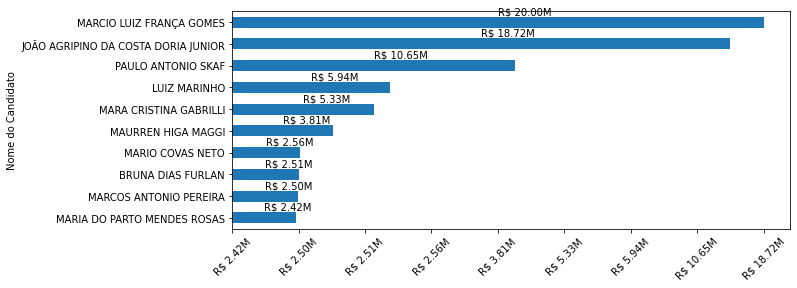

In [12]:
def formatar_valor(valor):
  return f'R$ {valor / 1000000:.2f}M'


import matplotlib.pyplot as plt

target_cleared = target.reset_index('SQ_CANDIDATO', drop=True).sort_values(ascending=True)

target_formatado = target_cleared.map(formatar_valor)

fig = plt.figure(figsize=(10, 4))
graph = target_cleared.plot.barh(figure=fig)

graph.set_ylabel('Nome do Candidato')
graph.set_xticklabels(target_formatado.values, rotation=45)

x_offset = 0
y_offset = 0.1

for index, rectangle in enumerate(graph.patches):
  box = rectangle.get_bbox()

  vr_receita = target_formatado.values[index]
  
  graph.annotate(vr_receita, ((box.x0 + box.x1) / 2 + x_offset, box.y1 + y_offset))

plt.locator_params(nbins=10)
plt.show()